# Evaluation metrics for dummies

## Definitions

In [278]:
# from sklearn.metrics import f1_score  # dependency for TEST1

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import (
    auc,
    roc_auc_score,
    roc_curve
)


def compare_Y__Y(tests, predictions):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i, y in enumerate(tests):
        _y = predictions[i]
        if y:
            if _y > 0.5:
                tp += 1
            else:
                fn += 1
        else:
            if _y > 0.5:
                fp += 1
            else:
                tn += 1
    return tp, tn, fp, fn

def precision(tp, tn, fp, fn):
    return round(tp / (tp + fp), 2)

# also 'sensitivity', 'hit rate', 'true positive rate (TPR)'
def recall(tp, tn, fp, fn):
    return round(tp / (tp + fn), 2)

def accuracy(tp, tn, fp, fn):
    return round((tp + tn) / (tp + fp + tn + fn), 2)

def f1(tp, tn, fp, fn):
    p = precision(tp, tn, fp, fn)
    r = recall(tp, tn, fp, fn)
    #return 2 * ((p * r) / (p + r))
    return 2 * tp / (2 * tp + fp + fn)    # 2 * tp = twice 'tp' because we are averaging (~merging) Precision and 
                                          # Recall, and they both have 'tp' in the numerator; then, we add the 
                                          # remaining term (the specific either to Precision or Recall) to the
                                          # denominator, in order to normalize the rate of 'tp' over the sum of the
                                          # 'tp' plus the deviation from the 'tp' in either direction.


# Recall over the negative class
# it answers "How many negative cases were detected over all the negative cases?"
# the higher the number of false positives, the lower the value (missed negatives)
#
# If the ratio is 100%, it means that it detects all the negatives and only those,
# i.e., it never misclassifies a negative as a positive. So, it implies 100% Precision.
#
# also 'true negative rate (TNR)'
def specificity(tp, tn, fp, fn):
    n = tn + fp
    return tn / float(n)

# also 'false positive rate (FPR)'
# equals to ```1 - specifity```
# rather than answering "How many negative cases were detected over all negatives?" (specificity),
# it answers "How many positive cases were incorrectly detected as negatives?".
# since it is the ratio for the other term of the denominator in the specifity formula,
# which is why it provides "the other view" and it can be calculated as its inverse, or
# `1 - specificity`.
def fallout(tp, tn, fp, fn, derivational=False):
    if not derivational:
        n = tn + fp
        return fp / float(n)
    else:
        return 1 - specificity(tp, tn, fp, fn)

In [279]:
def calculate_roc_auc(tests, predictions):
    fpr, tpr, thresholds = roc_curve([float(t) for t in tests], predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return tpr, fpr, roc_auc, thresholds


def draw(tpr, fpr, roc_auc, thresholds):
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()    


## Distributions

Some toy data. For instance, a collection of Covid-19 test results, where 0 = negative (no Covid-19) and 1 = positive (Covid-19!).

In [280]:
tests = [0, 0, 1, 0, 0, 1, 0, 0, 1, 0]

print('Our population has %s subjects...' % len(tests))
print('... %d out of which were found to be actually infected.' % sum(tests))

Our population has 10 subjects...
... 3 out of which were found to be actually infected.


A good set of predictions:

In [281]:
good_predictions = [0.1, 0.2, 0.8, 0.0, 0.15, 0.93, 0.3, 0.03, 0.88, 0.2]

A bad set of predictions:

In [282]:
bad_predictions = [0.4, 0.6, 0.7, 0.33, 0.45, 0.49, 0.55, 0.49, 0.2, 0.4]

An average set of predictions.

In [283]:
average_predictions = [0.1, 0.2, 0.8, 0.0, 0.15, 0.51, 0.6, 0.03, 0.67, 0.56]

An low-recall set of predictions.

In [284]:
low_recall = [0.1, 0.0, 0.89, 0.1, 0.05, 0.3, 0.1, 0.21, 0.44, 0.23]

An low-precision set of predictions.

In [285]:
low_precision = [0.1, 0.76, 0.8, 0.56, 0.71, 0.93, 0.56, 0.03, 0.88, 0.2]


--- 'bad' distribution ---
tp=1 tn=5 fp=2 fn=2
p=0.33
s=0.71
fo=0.29
r=0.33
a=0.60
f=0.33
roc_auc=0.55
[1.7  0.7  0.55 0.49 0.45 0.4  0.33 0.2 ]


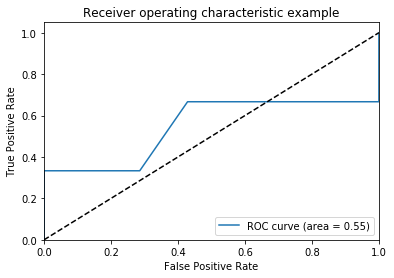


--- 'average' distribution ---
tp=3 tn=5 fp=2 fn=0
p=0.60
s=0.71
fo=0.29
r=1.00
a=0.80
f=0.75
roc_auc=0.90
[1.8  0.8  0.67 0.56 0.51 0.  ]


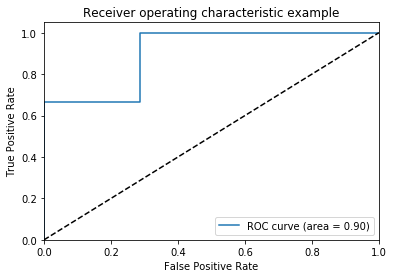


--- 'good' distribution ---
tp=3 tn=7 fp=0 fn=0
p=1.00
s=1.00
fo=0.00
r=1.00
a=1.00
f=1.00
roc_auc=1.00
[1.93 0.93 0.8  0.3  0.2  0.  ]


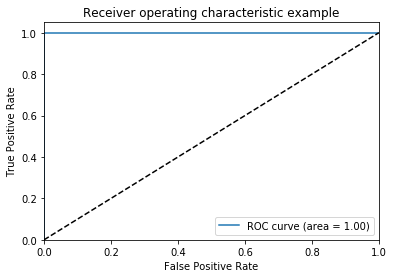


--- 'low recall' distribution ---
tp=1 tn=7 fp=0 fn=2
p=1.00
s=1.00
fo=0.00
r=0.33
a=0.80
f=0.50
roc_auc=1.00
[1.89 0.89 0.3  0.21 0.1  0.  ]


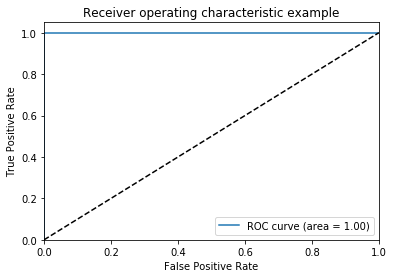


--- 'low precision' distribution ---
tp=3 tn=3 fp=4 fn=0
p=0.43
s=0.43
fo=0.57
r=1.00
a=0.60
f=0.60
roc_auc=1.00
[1.93 0.93 0.8  0.71 0.56 0.03]


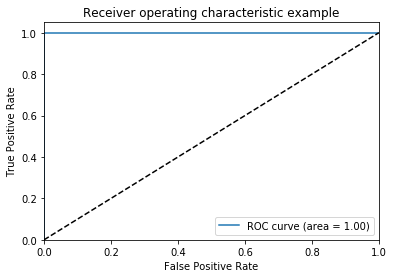

In [286]:
for name, predictions in [
    ('bad', bad_predictions),
    ('average', average_predictions),
    ('good', good_predictions),
    ('low recall', low_recall),
    ('low precision', low_precision)
]:
    tp, tn, fp, fn = compare_Y__Y(tests, predictions)
    print('\n--- \'%s\' distribution ---' % name)
    print('tp=%d tn=%d fp=%d fn=%d' % (tp, tn, fp, fn))
    print('p=%.2f' % precision(tp, tn, fp, fn))
    print('s=%.2f' % specificity(tp, tn, fp, fn))
    print('fo=%.2f' % fallout(tp, tn, fp, fn))
    print('r=%.2f' % recall(tp, tn, fp, fn))
    print('a=%.2f' % accuracy(tp, tn, fp, fn))
    print('f=%.2f' % f1(tp, tn, fp, fn))
    print('roc_auc=%.2f' % roc_auc_score(tests, predictions))
    #print('f_=%.2f' % f1_score(tests, [1 if p > 0.5 else 0 for p in predictions]))   # TEST1 (1 dependency)
        
    tpr, fpr, roc_auc, thresholds = calculate_roc_auc(tests, predictions)
    print(thresholds)
    draw(tpr, fpr, roc_auc, thresholds)
    